In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm

In [6]:
k = 1

def generate_sin(decay, x, y, x1=0, y1=0, phi=0):
    r = np.sqrt((x - x1)**2 + (y - y1)**2)
    decay = np.exp(-decay * r)
    return decay * np.sin(k * r - phi)

def generate_sin_line_cut(decay, x, x1):
    decay = np.exp(-decay * x1)
    print(decay)
    out = decay * np.sin(k * x)
    print(out)
    return out

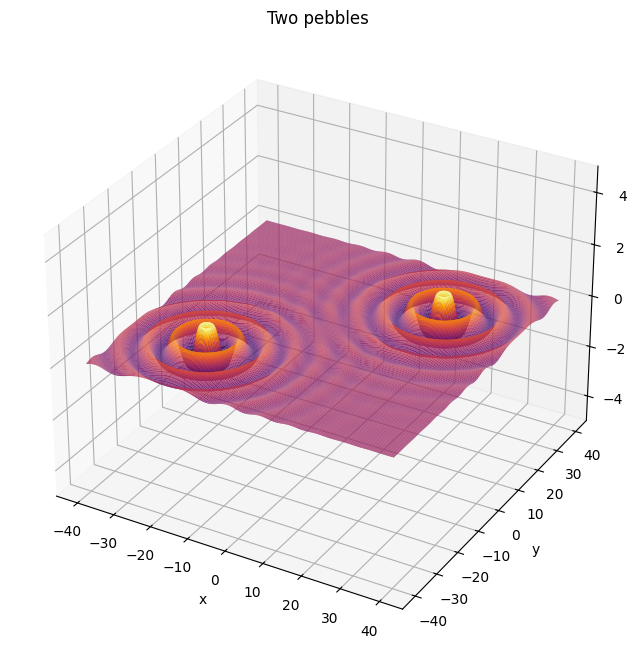

In [38]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Parameters
size = 40

x = np.linspace(-size, size, 1500)
y = np.linspace(-size, size, 1500)
X, Y = np.meshgrid(x, y)
Z = generate_sin(0.1, X, Y, -20, -20)

X2, Y2 = np.meshgrid(x, y)
Z2 = generate_sin(0.1, X2, Y2, 20, 20)

ax.set_title('Two pebbles')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_zlim(-5, 5)

ax.plot_surface(X, Y, Z + Z2, cstride=5, rstride=5, cmap=cm.inferno, linewidth=0)
plt.show()

In [ ]:
size = 40
x = np.linspace(-size, size, 1500)
y = np.linspace(-size, size, 1500)
X, Y = np.meshgrid(x, y)
X2, Y2 = np.meshgrid(x, y)  # actually X2 = X, Y2 = Y

def animate(phi):
    Z = generate_sin(0.075, X, Y, 20, 20, phi)
    Z2 = generate_sin(0.075, X2, Y2, -20, -20, phi)
    surface = ax.plot_surface(X, Y, Z, cmap=cm.inferno, cstride=6, rstride=6)
    return fig,

ani = animation.FuncAnimation(fig, animate, frames=np.linspace(0, 10, 10),
                              interval=1, blit=False)

writergif = animation.PillowWriter(fps=12)
ani.save('renders/single-pebble.gif', writer=writergif)

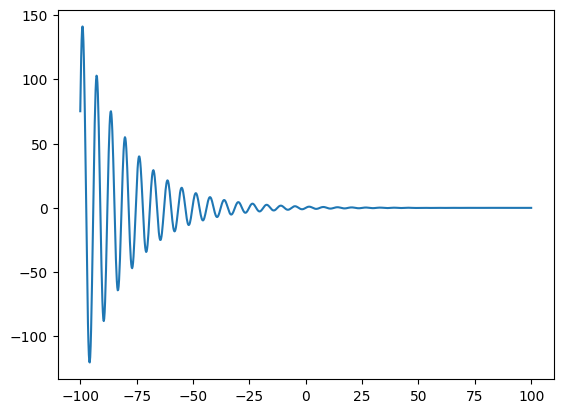

In [35]:
decay = np.linspace(-10, 10, 1000)
decay = np.exp(-decay * 0.5)

x = np.linspace(-100, 100, 1000)

plt.plot(x, np.sin(x) * decay)